## Importing Libraries

In [2]:
import json
import requests
import numpy as np
import pandas as pd
from io import StringIO

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [4]:
#for notebooks
init_notebook_mode(connected=True)
#for offline use
cf.go_offline()

### Setup

In [5]:
#url for Account Information
url_base = 'https://api.koios.rest/api/v0/'
df = pd.read_csv('Stake_Accounts_list.csv')

In [6]:
def koios_api_pull(url, type='get', headers=None, params=None, print_text=False):
    if type == 'get':
        r = requests.get(url, headers = headers, params=params)
    elif type == 'post':
        r = requests.post(url, headers = headers, data=params)
        
    if print_text:
        print(r.text)
        
    df = pd.read_csv(StringIO(r.text), sep=',')
    return df

### Getting the Account Information

In [8]:
headers = {'Accept':'text/csv'}

In [16]:
lis = list(df['id'])
data_dic = {"_stake_addresses":lis[0:500]}
data = json.dumps(data_dic)

In [17]:
url = url_base + 'account_info'
acc_info = koios_api_pull(url, type='post' , headers= headers , params = data)



In [18]:
acc_info['Index']=acc_info.index
acc_info

,stake_address,status,delegated_pool,total_balance,utxo,rewards,withdrawals,rewards_available,reserves,treasury,Index
0,stake1u9ylzsgxaa6xctf4juup682ar3juj85n8tx3hthn...,registered,pool1pu5jlj4q9w9jlxeu370a3c9myx47md5j5m2str0na...,0,0,0,0,0,0,0,0
1,stake1uyfmzu5qqy70a8kq4c8rw09q0w0ktfcxppwujejn...,not registered,NaN,0,0,0,0,0,0,0,1
2,stake1uxs70hw759k87fptvajc2w7erzq4pkq9u9gjf9g4...,registered,pool19w5khsnmu27au0kprw0kjm8jr7knneysj7lfkqvnu...,12556675057,12024820965,1446936701,915082609,531854092,0,0,2
3,stake1uydhlh7f2kkw9eazct5zyzlrvj32gjnkmt2v5qf6...,not registered,NaN,0,0,0,0,0,0,0,3
4,stake1u85jzzcp0dyl3xxqpjy5x7fqyadg9r2aq2r6lhhq...,registered,pool1ahazpr2yz5gljk2m4q8g7wnmq7m2sr9unhdfmr5ar...,60018161141,59958601229,3923255492,3863695580,59559912,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
495,stake1ux5xs224z7haz2z833x2mqs4r3megzyfmrkgzeeg...,not registered,NaN,1724961,1724961,0,0,0,0,0,495
496,stake1uxvrg9ua6s987anytfr9jmwek9dvlh6g3p7mc5mq...,not registered,NaN,0,0,0,0,0,0,0,496
497,stake1uypxnfwvgvzlcg8j9nqwuxl9hm7ea2ueywym6vfu...,not registered,NaN,1565140000,1565140000,0,0,0,0,0,497
498,stake1u9rjt5mfrset9km5pfg756nn5pmskdc0f2cl7jgz...,not registered,NaN,0,0,0,0,0,0,0,498


In [19]:
acc_info.to_csv('Account_Information.csv',index=False)

### Visualising the data

Text(0.5, 0, 'Stake Accounts')

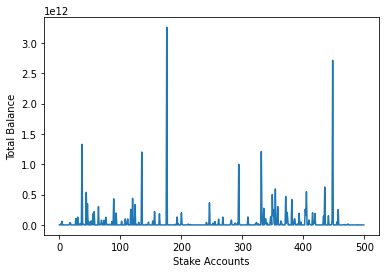

In [20]:
plt.plot(acc_info['Index'],acc_info['total_balance'])
plt.ylabel('Total Balance')
plt.xlabel('Stake Accounts')

In [21]:
acc = acc_info[['Index','stake_address','total_balance']].copy()
acc = acc[acc['total_balance']>0]
acc

,Index,stake_address,total_balance
2,2,stake1uxs70hw759k87fptvajc2w7erzq4pkq9u9gjf9g4...,12556675057
4,4,stake1u85jzzcp0dyl3xxqpjy5x7fqyadg9r2aq2r6lhhq...,60018161141
6,6,stake1uyxa895nulwuqe9m75g8ggqeu2a25dl4drh7mruj...,2262654574
8,8,stake1u8r9vvpvew8fkw3lzfq2ezk38xwpcktf8g6z6fml...,145016089
10,10,stake1uydzg05hgy3vp6evchsxej7cz2le3h5jmq920qg9...,6522480
...,...,...,...
489,489,stake1uygcvz9qykvm98zeaaa5ltz02u9tuj9h6m7azxpu...,3816676294
491,491,stake1uxcj7cvdkr83h4hvdda6k920dnjewg7vzc0s7x4y...,851423355
494,494,stake1ux85zm0zdsnhzcqgkqht8dhz8ef0zuf7g4xyvqha...,101720116
495,495,stake1ux5xs224z7haz2z833x2mqs4r3megzyfmrkgzeeg...,1724961


In [22]:
acc.nlargest(2,['total_balance'])

,Index,stake_address,total_balance
176,176,stake1u844au4xu2gfaheearyu0qyhg35sxa40e3gu5pl0...,3259893266423
448,448,stake1u8wljgnnly9j3gkh6nenrx5exua2mn0775rsxmtg...,2714530392562


In [23]:
acc.nsmallest(2,['total_balance'])

,Index,stake_address,total_balance
20,20,stake1uxglx5pg0y49td9djar0yts7z8xu9q70dwdahf4l...,10
314,314,stake1u9ys8jyguchhelhy72edsrcs2f4apfrnjh93qued...,38


Text(0.5, 0, 'Stake Accounts')

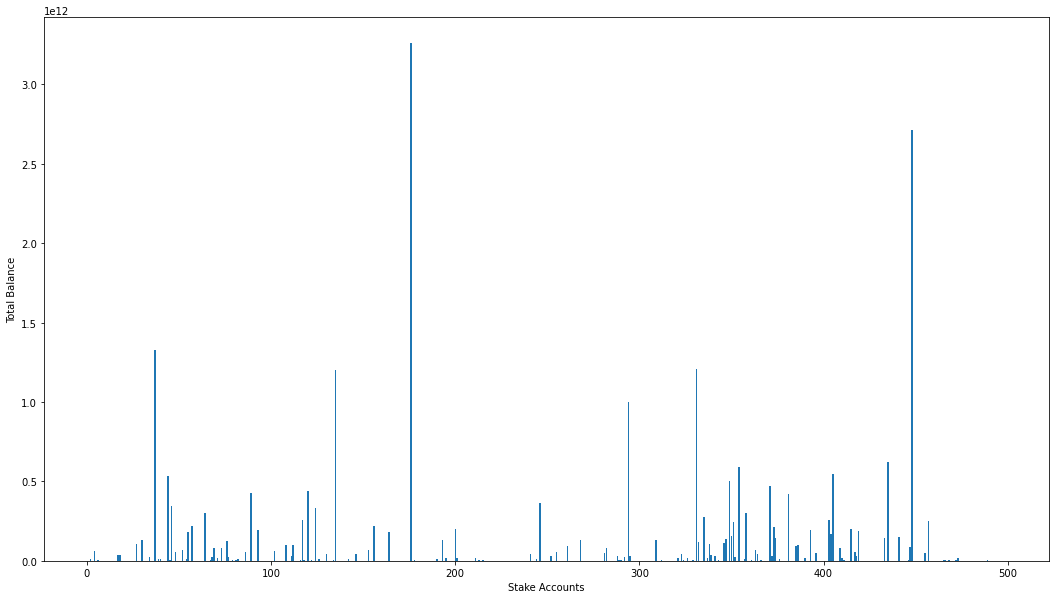

In [24]:
plt.figure(figsize=(18,10))
plt.bar(acc['Index'],acc['total_balance'])
plt.ylabel('Total Balance')
plt.xlabel('Stake Accounts')

In [25]:
fig = acc.iplot(kind='bar')